# 4.0 Data and Feature Validation (Trial 2)

### Required Modules

In [31]:
# Basic Operations
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Data Set Up

In [11]:
# Raw Data
raw_data = pd.read_csv("data/training-set-1/pose_data_raw.csv")

raw_data['label'] = raw_data['pose_name'].str.replace('-lft', '').str.replace('-rgt', '')
labels, uniques = pd.factorize(raw_data['label'])
raw_data['label_encoded'] = labels 

X= raw_data.iloc[:,2:134]
y = raw_data['label_encoded'].values

# Augmented Data
aug_data1 = pd.read_csv("data/training-set-1/pose_data_augmented.csv")
Xa1 = aug_data1.iloc[:,5:134]
ya1 = aug_data1['label_encoded'].values

# Augmented Data with Added/Removed Features
aug_data2 = pd.read_csv("data/training-set-1/pose_data_augmented_res.csv")
aug_data2 = aug_data2.loc[:, ~aug_data2.columns.str.contains('_v')] #Removed Visibility Variable
Xa2 = aug_data2.iloc[:,5:134]
ya2 = aug_data2['label_encoded'].values

## 4.1 Cross Validation of Data Augmentation

<Axes: >

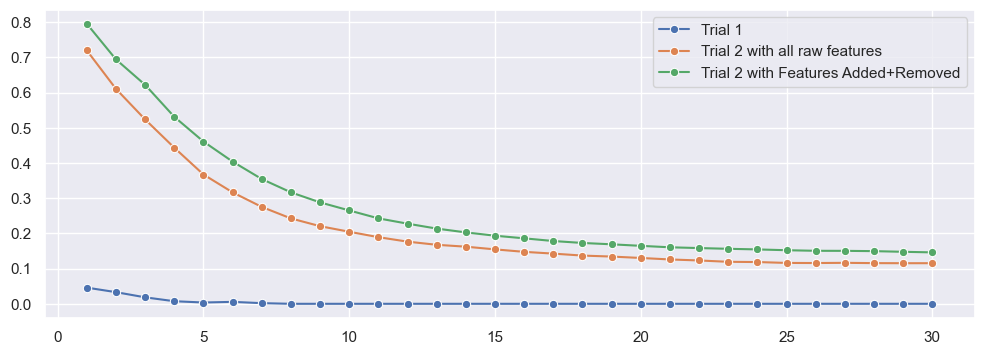

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Xa1_scaled = scaler.fit_transform(Xa1)
Xa2_scaled = scaler.fit_transform(Xa2)

k_values = [i for i in range(1, 31)]

X_score_means = []
Xa1_score_means = []
Xa2_score_means = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_score = cross_val_score(knn, X_scaled, y, cv=LeaveOneOut(), scoring='accuracy')
    X_score_means.append(np.mean(X_score))
    Xa1_score = cross_val_score(knn, Xa1_scaled, ya1, cv=10, scoring='accuracy')
    Xa1_score_means.append(np.mean(Xa1_score))
    Xa2_score = cross_val_score(knn, Xa2_scaled, ya2, cv=10, scoring='accuracy')
    Xa2_score_means.append(np.mean(Xa2_score))

sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = X_score_means, marker = 'o', label='Trial 1')
sns.lineplot(x = k_values, y = Xa1_score_means, marker = 'o', label='Trial 2 with all raw features')
sns.lineplot(x = k_values, y = Xa2_score_means, marker = 'o', label='Trial 2 with Features Added+Removed')

## 4.2 Principal Component Analysis and KNN

The augmented dataset with the highest accuracy score is used for further analysis.

In [35]:
aug_data2

,image_filename,pose_name,label,label_encoded,theta,landmark_00_x,landmark_00_y,landmark_00_z,landmark_01_x,landmark_01_y,...,d_elbows,d_knees,d_ankles,a_nose_to_rgt_shoulder,a_nose_to_lft_shoulder,a_mid_hip_to_knees,a_lft_shoulder_to_wrist,a_lft_hip_to_ankle,a_rgt_shoulder_to_wrist,a_rgt_hip_to_ankle
0,advanced-figurehead-lft.png,advanced-figurehead-lft,advanced-figurehead,0,0,0.545408,0.740922,-0.407526,0.529543,0.728610,...,0.0334,0.0267,0.0124,10.7029,-122.8088,0.6969,291.3413,98.4931,276.8157,102.7408
1,advanced-figurehead-lft.png,advanced-figurehead-lft,advanced-figurehead,0,10,0.607888,0.740922,-0.306625,0.586982,0.728610,...,0.1425,0.1129,0.1207,-137.2727,33.0201,-25.9627,294.2652,94.5808,268.7887,107.6087
2,advanced-figurehead-lft.png,advanced-figurehead-lft,advanced-figurehead,0,20,0.651898,0.740922,-0.196408,0.626586,0.728610,...,0.2668,0.2357,0.2498,-134.0704,41.4422,-51.8355,295.3539,88.8913,254.5938,110.7964
3,advanced-figurehead-lft.png,advanced-figurehead-lft,advanced-figurehead,0,30,0.676100,0.740922,-0.080224,0.647152,0.728610,...,0.3841,0.3521,0.3714,-126.3352,50.6887,-74.8649,294.9057,81.4701,231.1617,112.4588
4,advanced-figurehead-lft.png,advanced-figurehead-lft,advanced-figurehead,0,40,0.679759,0.740922,0.038399,0.648054,0.728610,...,0.4901,0.4580,0.4817,-114.6003,63.1216,-92.7334,293.0172,72.4473,200.5086,112.6505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,yogini-twisted-rgt.png,yogini-twisted-rgt,yogini-twisted,271,310,0.221597,0.731075,-0.655868,0.241815,0.751349,...,0.5911,0.5505,0.6199,121.7164,-47.0931,154.3500,172.0633,31.9434,-228.7234,-201.5062
19580,yogini-twisted-rgt.png,yogini-twisted-rgt,yogini-twisted,271,320,0.332121,0.731075,-0.607424,0.348152,0.751349,...,0.5291,0.5494,0.6267,140.0934,-26.8885,154.1885,174.1254,36.1317,-214.9999,-209.2061
19581,yogini-twisted-rgt.png,yogini-twisted-rgt,yogini-twisted,271,330,0.432553,0.731075,-0.540524,0.443911,0.751349,...,0.4541,0.5319,0.6252,147.7341,-16.1314,153.2878,175.4786,41.6074,-199.8780,-216.7328
19582,yogini-twisted-rgt.png,yogini-twisted-rgt,yogini-twisted,271,340,0.519843,0.731075,-0.457200,0.526182,0.751349,...,0.3702,0.4986,0.6154,149.7391,-8.2069,151.5254,176.4539,48.8414,-183.9328,-224.2409


In [21]:
X_train, X_test, y_train, y_test = train_test_split(Xa2_scaled, ya2, stratify=ya2, test_size=0.2, random_state=42)

/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_52208/851408049.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('hsv', num_classes)


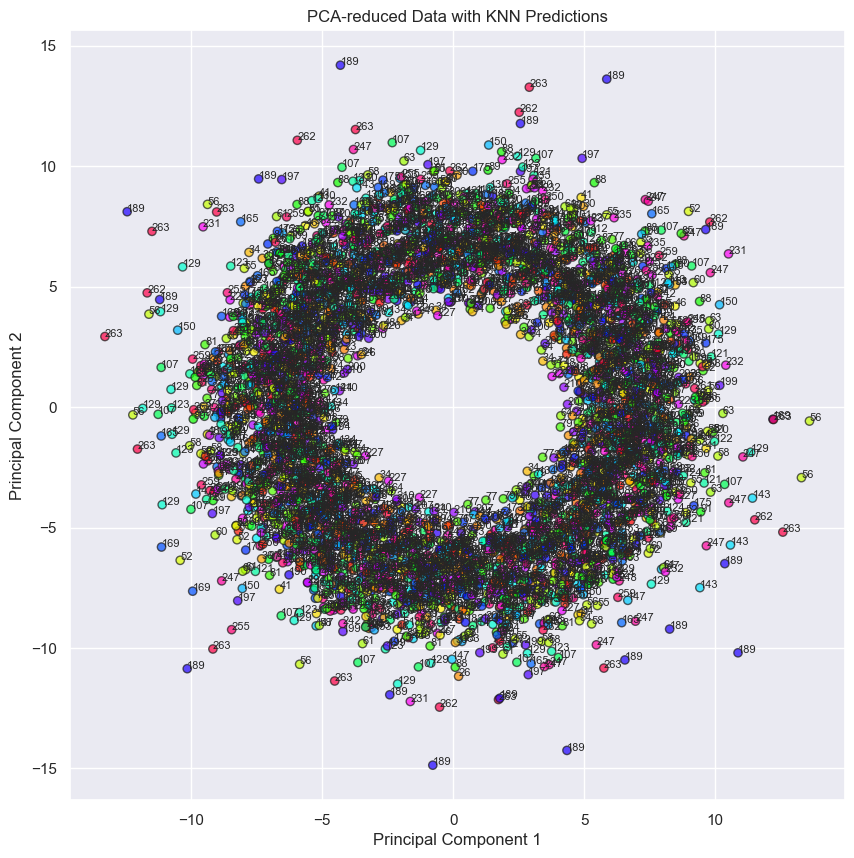

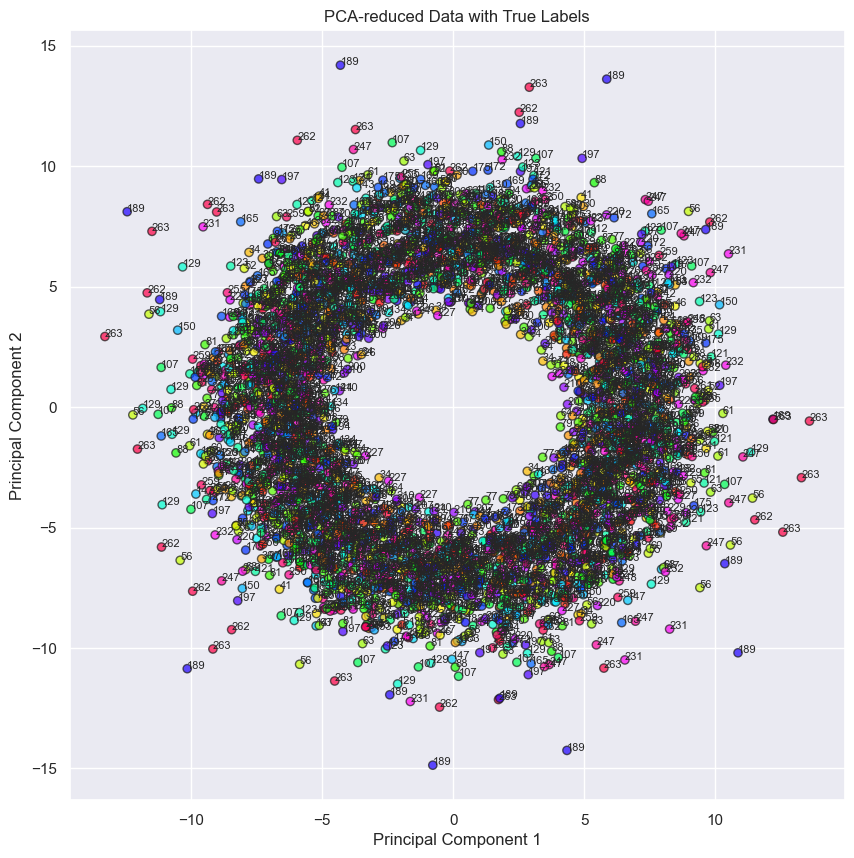

/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_52208/851408049.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', marker='x', edgecolor='k', alpha=0.7, label='Incorrect')


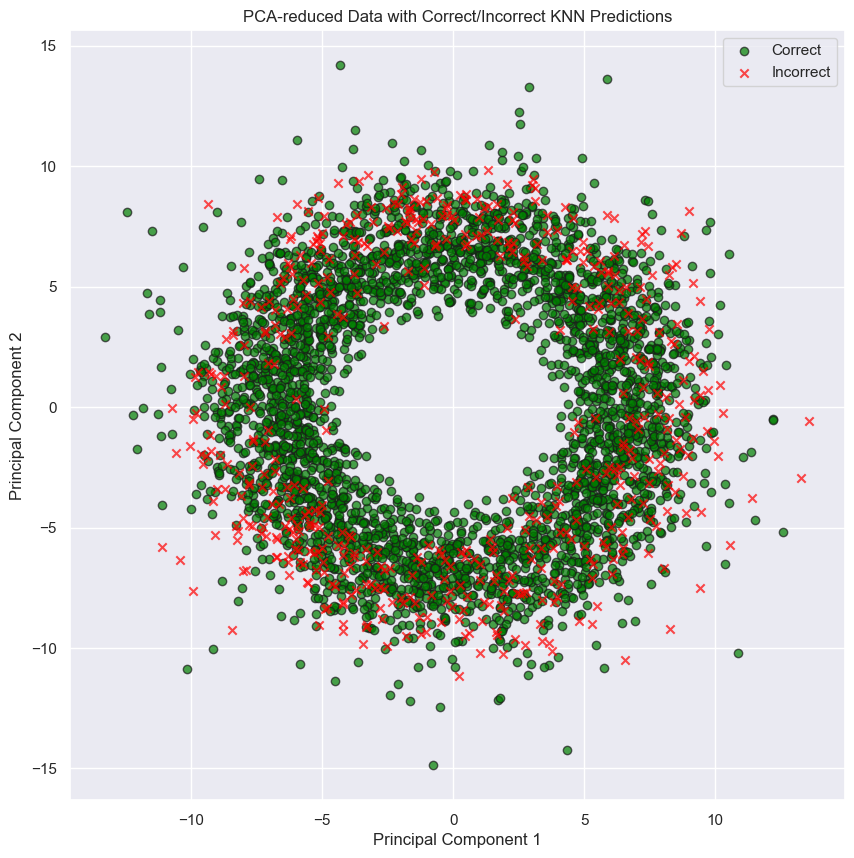

In [28]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = KNeighborsClassifier(n_neighbors=11, weights='distance')
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

num_classes = len(np.unique(ya2))
colormap = cm.get_cmap('hsv', num_classes)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap=colormap, edgecolor='k', alpha=0.7)
for i, txt in enumerate(y_pred):
    plt.annotate(txt, (X_test_pca[i, 0], X_test_pca[i, 1]), fontsize=8)

plt.title('PCA-reduced Data with KNN Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# True Labels
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=colormap, edgecolor='k', alpha=0.7)
for i, txt in enumerate(y_test):
    plt.annotate(txt, (X_test_pca[i, 0], X_test_pca[i, 1]), fontsize=8)
plt.title('PCA-reduced Data with True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Predictions
plt.figure(figsize=(10, 10))
correct = y_pred == y_test
plt.scatter(X_test_pca[correct, 0], X_test_pca[correct, 1], c='green', marker='o', edgecolor='k', alpha=0.7, label='Correct')
incorrect = ~correct
plt.scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', marker='x', edgecolor='k', alpha=0.7, label='Incorrect')
plt.title('PCA-reduced Data with Correct/Incorrect KNN Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## 4.3 Linear Discriminant Analysis and KNN

The augmented dataset with the highest accuracy score is used for further analysis.

/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_52208/2560985551.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('hsv', num_classes)


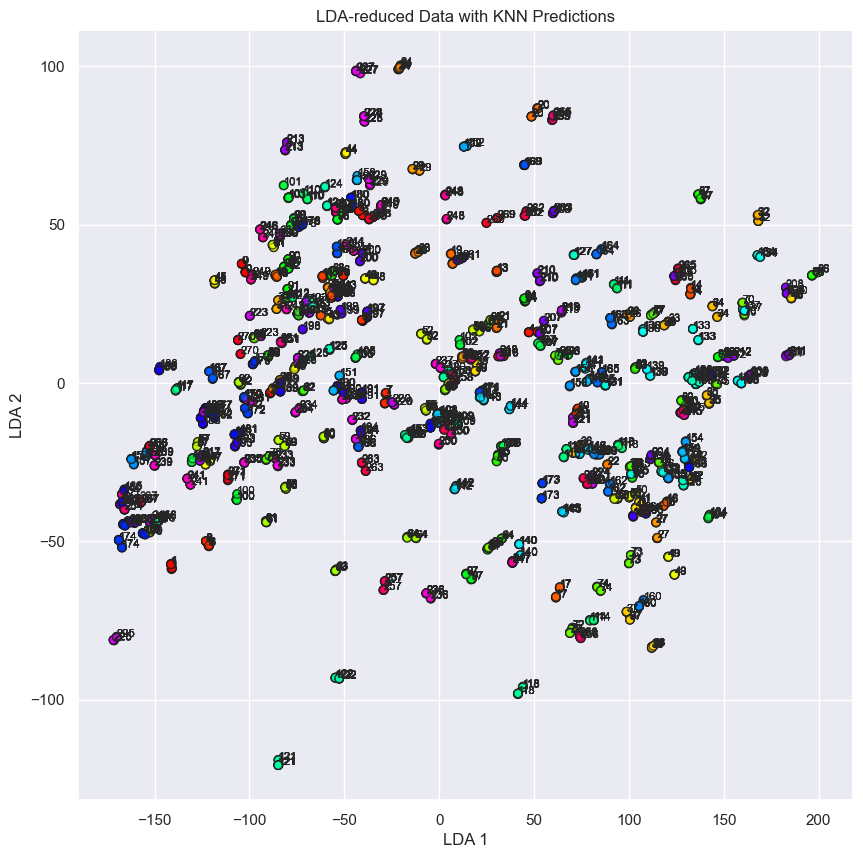

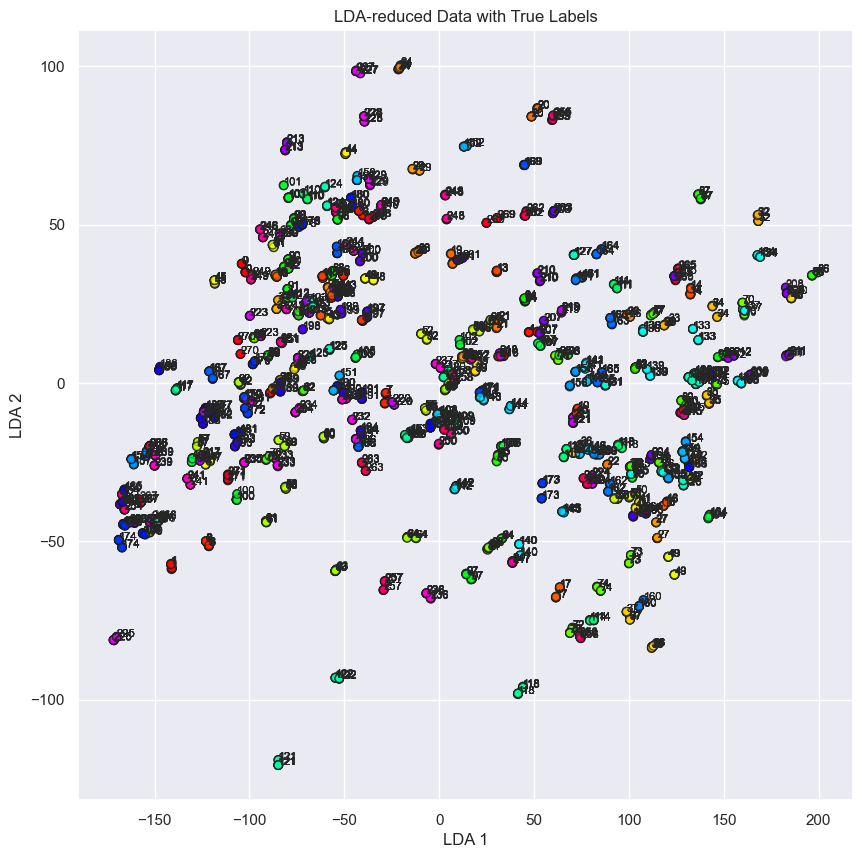

/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_52208/2560985551.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_lda[incorrect, 0], X_test_lda[incorrect, 1], c='red', marker='x', edgecolor='k', alpha=0.7, label='Incorrect')


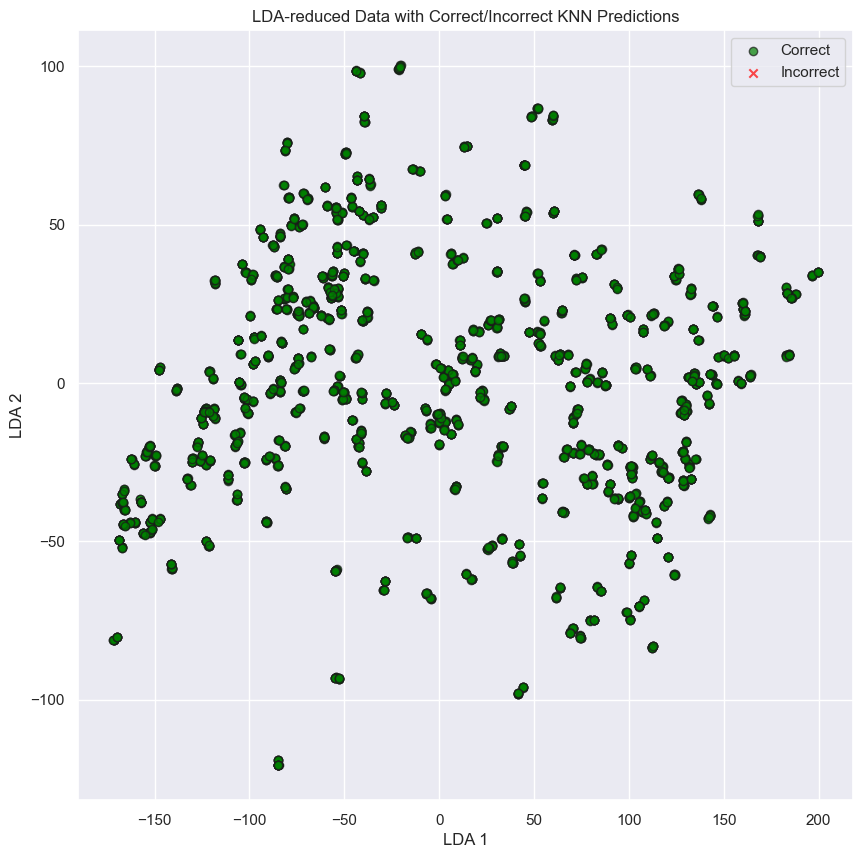

In [34]:
lda = LinearDiscriminantAnalysis(n_components=10)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

model = KNeighborsClassifier(n_neighbors=30, weights='distance')
model.fit(X_train_lda, y_train)

y_pred = model.predict(X_test_lda)

num_classes = len(np.unique(ya2))
colormap = cm.get_cmap('hsv', num_classes)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_pred, cmap=colormap, edgecolor='k', alpha=0.7)
for i, txt in enumerate(y_pred):
    plt.annotate(txt, (X_test_lda[i, 0], X_test_lda[i, 1]), fontsize=8)

plt.title('LDA-reduced Data with KNN Predictions')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid(True)
plt.show()

# True Labels
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap=colormap, edgecolor='k', alpha=0.7)
for i, txt in enumerate(y_test):
    plt.annotate(txt, (X_test_lda[i, 0], X_test_lda[i, 1]), fontsize=8)
plt.title('LDA-reduced Data with True Labels')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid(True)
plt.show()

# Predictions
plt.figure(figsize=(10, 10))
correct = y_pred == y_test
plt.scatter(X_test_lda[correct, 0], X_test_lda[correct, 1], c='green', marker='o', edgecolor='k', alpha=0.7, label='Correct')
incorrect = ~correct
plt.scatter(X_test_lda[incorrect, 0], X_test_lda[incorrect, 1], c='red', marker='x', edgecolor='k', alpha=0.7, label='Incorrect')
plt.title('LDA-reduced Data with Correct/Incorrect KNN Predictions')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.grid(True)
plt.show()

## Trial 2 Findings

- The high accuracy achieved through cross-validation implies the effectiveness of the data augmentation process. It can also be observed how removing visibility variables improved the cross-validation mean score.
- The presence of overlapping classes in both KNN with PCA and LDA analyses indicates potential issues with class separability. The high predictive performance on the test split might also reflect overfitting rather than generalizable learning.
- In the LDA and KNN analysis, it can also be observed how unique pose classes seem to duplicate, and when the annotated images were observed, it was discovered that despite mirroring the images horizontally and extracting features the same way, the Mediapipe human pose estimation model sometimes omit mistakes in differentiating right and left, plus more inconsistencies on the foot are discovered.
- The LDA and KNN analysis revealed instances where unique pose classes appeared to be duplicated. Upon reviewing the annotated images, MediaPipe HPE misidentified right for left (and vice versa) in a few instances.  Additionally, inconsistencies in hand and feet positioning were observed. Therefore, it might make a difference to focus on fewer landmarks that depict similar information.
- Moving forward with feature validation, it is essential to explore the relationships between features, remove features that might not be important (eyebrows, mouth, etc),  improve data quality by considering z-dimension in the feature creation, and perform feature importance experiments to gain more insights.